# Week 4
### Introduction to Data Science
### Timo Ijäs

## Exercise 1

In [213]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from PIL import Image
from collections import Counter 
import ast
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import csv

import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from numpy import mean
from numpy import std

from numpy import arange

In [214]:
df = pd.read_csv('ted_main.csv', converters = {'ratings':eval, 'tags':eval})
df['ratings'][2]

[{'id': 7, 'name': 'Funny', 'count': 964},
 {'id': 3, 'name': 'Courageous', 'count': 45},
 {'id': 9, 'name': 'Ingenious', 'count': 183},
 {'id': 1, 'name': 'Beautiful', 'count': 60},
 {'id': 21, 'name': 'Unconvincing', 'count': 104},
 {'id': 11, 'name': 'Longwinded', 'count': 78},
 {'id': 8, 'name': 'Informative', 'count': 395},
 {'id': 10, 'name': 'Inspiring', 'count': 230},
 {'id': 22, 'name': 'Fascinating', 'count': 166},
 {'id': 2, 'name': 'Confusing', 'count': 27},
 {'id': 25, 'name': 'OK', 'count': 146},
 {'id': 24, 'name': 'Persuasive', 'count': 230},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 54},
 {'id': 26, 'name': 'Obnoxious', 'count': 142}]

In [215]:
funny = []
confusing = []
inspiring = []
df['Funny'] = 0
df['Confusing']=0
df['Inspiring']=0

for index, row in df.iterrows():
    for item in row['ratings']:
        #print(item)
        if(item['id']==7):
            df.at[index, 'Funny']= item['count']
        elif(item['id']==2):
            df.at[index,'Confusing']=item['count']
        elif(item['id']==10):
            df.at[index,'Inspiring']=item['count']

In [216]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,Funny,Confusing,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"[children, creativity, culture, dance, educati...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,19645,242,24924
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"[alternative energy, cars, climate change, cul...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,544,62,413
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"[computers, entertainment, interface design, m...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,964,27,230
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"[MacArthur grant, activism, business, cities, ...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,59,32,1070
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"[Africa, Asia, Google, demo, economics, global...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,1390,72,2893


In [217]:
tags = []
for item in df['tags']:
    tags += item


In [218]:
most_common = Counter(tags).most_common(100)
print("most common")
most_common

most common


[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229),
 ('society', 224),
 ('art', 221),
 ('social change', 218),
 ('future', 195),
 ('communication', 191),
 ('creativity', 189),
 ('biology', 189),
 ('humanity', 182),
 ('collaboration', 174),
 ('environment', 165),
 ('economics', 164),
 ('medicine', 162),
 ('brain', 158),
 ('activism', 157),
 ('education', 153),
 ('community', 148),
 ('history', 146),
 ('children', 143),
 ('TED Fellows', 143),
 ('music', 140),
 ('invention', 140),
 ('health care', 132),
 ('politics', 128),
 ('cities', 123),
 ('psychology', 122),
 ('storytelling', 120),
 ('performance', 117),
 ('women', 117),
 ('nature', 116),
 ('war', 113),
 ('identity', 113),
 ('computers', 111),
 ('engineering', 111),
 ('life', 111),
 ('animals', 109),
 ('Africa', 105),
 ('humor', 105),
 ('exploration', 100),
 ('personal growth', 96),
 (

In [219]:
tag100 = pd.DataFrame(most_common, columns =['Tag', 'Count'])
tag100['tagExists'] = 0
tag100

,Tag,Count,tagExists
0,technology,727,0
1,science,567,0
2,global issues,501,0
3,culture,486,0
4,TEDx,450,0
...,...,...,...
95,demo,53,0
96,poetry,53,0
97,illness,53,0
98,universe,52,0


In [220]:
itags = tag100.set_index(tag100['Tag'])
itags.head()

,Tag,Count,tagExists
Tag,,,
technology,technology,727,0
science,science,567,0
global issues,global issues,501,0
culture,culture,486,0
TEDx,TEDx,450,0


In [221]:
# Init variable where dictionary of top 100 tags is inserted
tagdict = None
tagExists = None

# Init column in df where dictionaries of top 100 tags are inserted
df['tag100'] = None
df['tagExists'] = None

for index, row in df.iterrows():
    for tag in row['tags']:
        if (itags.index.isin([tag]).any()):
            itags.at[tag, 'tagExists']=1
    
    # Create dictionary of the top 100 tags and values columns
    tagdict=pd.Series(itags.tagExists.values, index=itags.Tag).to_dict()
    tagExists = itags['tagExists'].tolist()
    df.at[index,'tag100'] = tagdict
    df.at[index, 'tagExists'] = tagExists
    
    # Initialize tagExists column for the next loop
    itags['tagExists']=0

In [222]:
df['tags'][1]

['alternative energy',
 'cars',
 'climate change',
 'culture',
 'environment',
 'global issues',
 'science',
 'sustainability',
 'technology']

In [223]:
#dropdf= (df.drop(['views','ratings','related_talks','tags','description', 'event', 'film_date','name','num_speaker','published_date','url','main_speaker','published_date','speaker_occupation','title','tag100','tagExists'],axis=1)).copy()
dropdf = df[['comments','duration','languages','Funny','Confusing','Inspiring','views']]
dropdf.head()

,comments,duration,languages,Funny,Confusing,Inspiring,views
0,4553,1164,60,19645,242,24924,47227110
1,265,977,43,544,62,413,3200520
2,124,1286,26,964,27,230,1636292
3,200,1116,35,59,32,1070,1697550
4,593,1190,48,1390,72,2893,12005869


In [224]:
data1 = pd.concat([dropdf,(pd.DataFrame(df['tag100'].tolist()))],axis=1)
data1.head()

,comments,duration,languages,Funny,Confusing,Inspiring,views,technology,science,global issues,...,food,religion,peace,ecology,family,demo,poetry,illness,universe,energy
0,4553,1164,60,19645,242,24924,47227110,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,265,977,43,544,62,413,3200520,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,124,1286,26,964,27,230,1636292,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,200,1116,35,59,32,1070,1697550,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,593,1190,48,1390,72,2893,12005869,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [225]:
from sklearn.model_selection import train_test_split



In [226]:
def MeanAvErr(close_predictions, Y_test):
    mae = sum(abs(close_predictions - Y_test)) / Y_test.shape[0]
    return mae

In [227]:
def makeLinearRegression(data, target):
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.1, random_state=3)
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    close_predictions = lr.predict(X_test)
    
    mae = MeanAvErr(close_predictions, Y_test)
    name = Y_train.name
    
    print("Mean average error for " + name + " is: " + str(mae))
    
    resultdf = pd.DataFrame({'Actual': Y_test, 'Predicted': close_predictions})
    plotError(resultdf, name)
    
    return resultdf

In [228]:
def plotError(resultdf, name):    
    error = resultdf['Actual'] - resultdf['Predicted']
    error = error.tail(50)

    error.plot(kind='bar',figsize=(8,6))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("Errors for "+ name)
    plt.xticks(rotation=45)
    plt.show()

Mean average error for views is: 638143.3319761916


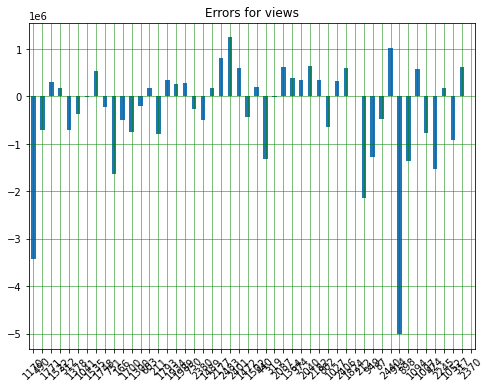

In [229]:
colname = 'views'
target= df[colname].copy()
variables = data1.drop(colname,axis=1)
viewresult = makeLinearRegression(variables, target)

In [230]:
viewresult.mean()

Actual       1.533975e+06
Predicted    1.619394e+06
dtype: float64

Mean average error for Funny is: 163.61285927735858


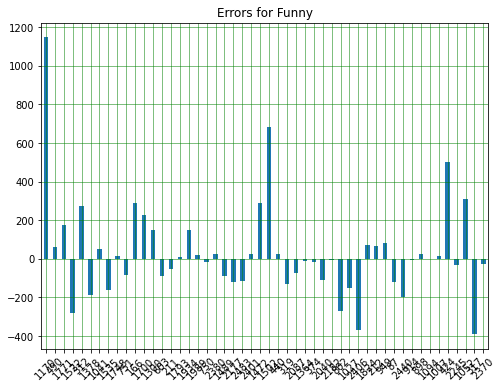

In [231]:
colname = 'Funny'
variables = data1.drop(colname,axis=1)
target = df[colname]
funnyresult = makeLinearRegression(variables,target)


Mean average error for Inspiring is: 346.36105644620955


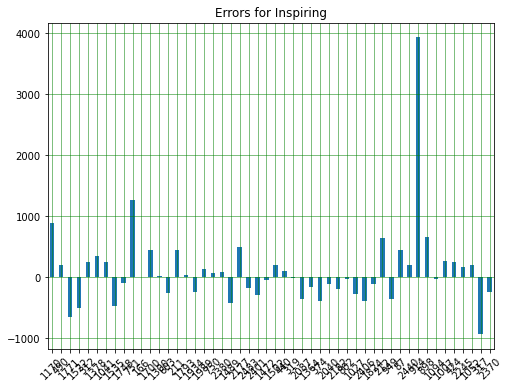

In [232]:
colname = 'Inspiring'
target= df[colname]
variables = data1.drop(colname,axis=1)
inspiringresult = makeLinearRegression(variables,target)

Mean average error for Confusing is: 13.766456383848377


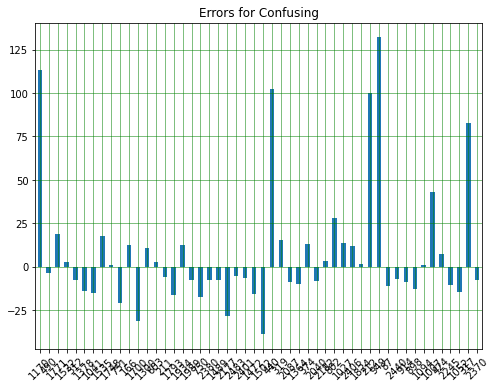

In [233]:
colname = 'Confusing'
target = df[colname]
variables = data1.drop(colname, axis=1)
confusingResult = makeLinearRegression(variables,target)

In [234]:
colname = 'views'
target = df[colname]
variables = data1.drop(colname, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(variables, target, test_size=0.1, random_state=3)

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X_train,Y_train).coef_
lasso_coef

array([ 4.19358893e+02,  2.73209258e+02,  4.14622189e+04,  1.05329523e+03,
        9.99991521e+03,  1.04343567e+03,  3.68660945e+03, -1.46373369e+05,
       -3.44476647e+05, -1.91370301e+04, -5.26965645e+04, -1.78408091e+05,
       -2.04971535e+03, -1.17722004e+05,  8.25662844e+04, -7.14033297e+04,
        2.99492986e+05, -6.11712569e+04, -4.65006770e+04,  3.25893399e+04,
        1.60507972e+05, -2.69882139e+05, -3.60939727e+03,  1.30998901e+05,
        8.57084571e+03, -6.53027956e+04, -4.48106889e+04,  6.01419086e+04,
        3.18351251e+05, -1.24103284e+05, -2.48575717e+05, -2.12285343e+05,
        1.46925620e+05, -3.28082675e+05, -1.64185966e+05, -1.39504081e+05,
       -1.38605476e+03, -2.56994668e+05, -2.30628839e+05, -3.76040400e+04,
        4.66619633e+05, -2.79782433e+05,  3.53916487e+05, -1.98261792e+05,
        3.68454702e+05, -5.44950318e+04, -1.93089552e+04, -1.55595477e+05,
        6.81598392e+04, -3.90529097e+05,  3.64300355e+04, -2.67680329e+04,
       -1.60928831e+05,  

In [235]:
len(lasso_coef)

106

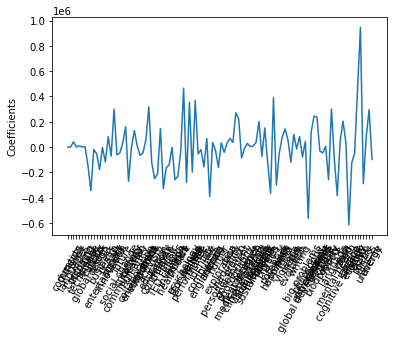

In [236]:
names = X_train.columns
plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)),names,rotation=60)
plt.ylabel("Coefficients")
plt.show()


In [237]:
def goodAndBadTags(variables, target, minmax):
    # load data
    X = variables
    y = target

    # Use L1 penalty
    estimator = LassoCV(cv=5, normalize = True)

    # Set a minimum threshold of 0.25
    sfm = SelectFromModel(estimator, threshold=0.25, prefit=False, norm_order=1, max_features=None)

    sfm.fit(X, y)

    feature_idx = sfm.get_support()
    feature_name = X.columns[feature_idx]

    lassoDf = pd.DataFrame()
    
    for item in feature_name:
        lassoDf = pd.concat([lassoDf, data1[item]],axis=1)

    colname = target.name
    
    result = makeLinearRegression(variables,target)

    coeffs = sfm.estimator_.coef_
    
    print("Coefficients for " + colname)
    print(coeffs)

    bads = []
    goods = []
    

    for index in range(variables.shape[1]):
        if (coeffs[index] <minmax[0]):
            bads.append(variables.iloc[: , index].name)
        if(coeffs[index]>minmax[1]):
            goods.append(variables.iloc[: , index].name)


    print("Bad tags for " + colname)     
    print(bads)
    print("Good tags for " + colname)
    print(goods)

Mean average error for views is: 638143.3319761916


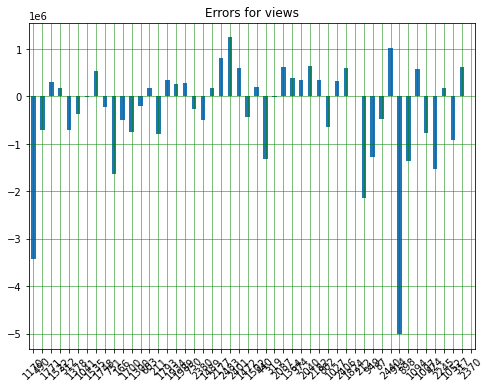

Coefficients for views
[ 3.64375280e+02  2.25925478e+01  3.14009723e+04  9.90052817e+02
  9.42609202e+03  1.03700430e+03  0.00000000e+00  0.00000000e+00
 -2.08220846e+05 -0.00000000e+00 -0.00000000e+00 -5.11178401e+04
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.54840072e+04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.91082777e+04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.08624029e+05 -0.00000000e+00 -6.37927046e+03 -0.00000000e+00
  0.00000000e+00 -3.87128879e+04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.69220595e+05 -4.78901893e+03  1.55748090e+04 -0.00000000e+00
  4.91980732e+04 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  

In [238]:
colname = 'views'
target = df[colname]
variables = data1.drop(colname, axis=1)
goodAndBadTags(variables,target,[-100000,100000])

Mean average error for Funny is: 163.61285927735858


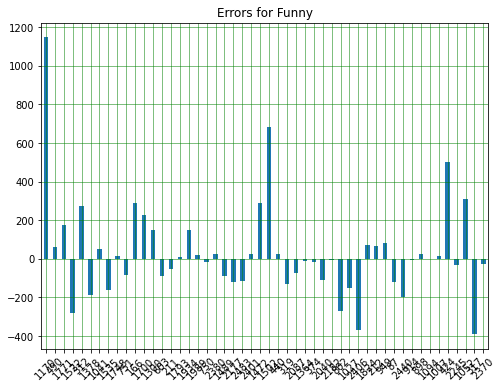

Coefficients for Funny
[ 8.78544298e-02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.64063887e-02  1.10155511e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  7.84854833e+01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.48221945e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.54170851e+01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.44525733e+02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -

In [239]:
colname = 'Funny'
target = df[colname]
variables = data1.drop(colname, axis=1)
goodAndBadTags(variables,target,[0,10])

Mean average error for Inspiring is: 346.36105644620955


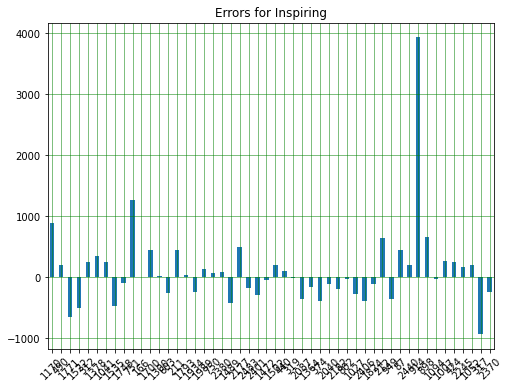

Coefficients for Inspiring
[ 9.55399415e-01  3.27725983e-02 -1.91265893e+00  5.89219274e-02
 -4.79891581e-01  3.35051215e-04 -1.08803025e+01 -8.51619671e+01
  1.48802926e+01 -0.00000000e+00  4.15258093e+01  0.00000000e+00
  6.31381686e+01 -1.97638836e+01  0.00000000e+00  9.59894058e+00
 -0.00000000e+00  0.00000000e+00  4.41754711e+01 -0.00000000e+00
  0.00000000e+00  1.36703409e+02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.13306785e+02  0.00000000e+00
 -0.00000000e+00  3.40593725e+00  1.46401705e+02  2.89299963e+01
 -6.03381762e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.94477566e+01 -1.91473854e+01  1.28041721e+01
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.53224377e+02 -0.00000000e+00  2.91041036e+01
 -3.03763902e+02 -0.00000000e+00  1.06929412e+02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+0

In [240]:
colname = 'Inspiring'
target = df[colname]
variables = data1.drop(colname, axis=1)
goodAndBadTags(variables,target,[-150,150])

Mean average error for Confusing is: 13.766456383848377


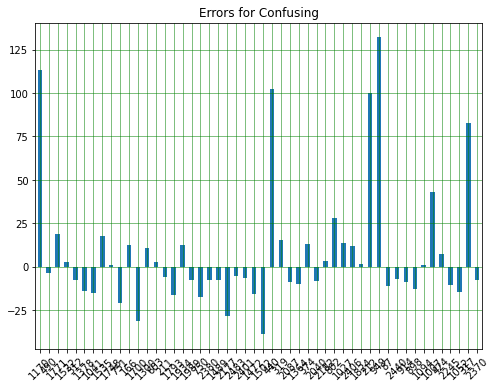

Coefficients for Confusing
[ 1.95100818e-02  1.41166506e-04  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.41470773e-06  0.00000000e+00  2.01690674e+00
 -0.00000000e+00  4.33237227e+00 -1.73004888e+00  1.24729114e+00
  0.00000000e+00  3.80819822e+00 -2.93347978e+00 -4.30001644e+00
 -2.62213836e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.18291762e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -6.20321448e-01
  5.67502964e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -7.47143845e-02 -1.00719494e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.04079420e+00  0.00000000e+00  0.00000000e+00 -1.95943386e+00
 -2.87254085e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -8.54563281e-01 -3.80476957e+00 -1.81960230e+00
  3.89944122e+00 -7.88515921e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.45256351e+0

In [241]:
colname = 'Confusing'
target = df[colname]
variables = data1.drop(colname, axis=1)
goodAndBadTags(variables,target,[-2,5])

## Exercise 2

In [242]:
targets = pd.read_csv("targetdata.csv")
symbols = []


with open('symboldata.csv', newline='') as f:
    reader = csv.reader(f)
    symbols = list(reader)

In [243]:
import ast

symbols =pd.read_csv('symboldata.csv', delimiter=',', header=None)
symbols = symbols.T
symbols = symbols.rename(columns={0:'datastr'})
type(symbols['datastr'][0])

symbols['Data'] = None

for index, row in symbols.iterrows():
    symbols.at[index,'Data']= ast.literal_eval(row['datastr'])

In [244]:
symbols

,datastr,Data
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
3,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
4,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
...,...,...
1015,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1016,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1017,"[255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, ...","[255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, ..."
1018,"[255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, ...","[255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 0, ..."


In [245]:
symbols = pd.concat([symbols,(pd.DataFrame(symbols['Data'].tolist()))],axis=1)

#pd.DataFrame(symbols['Data'].tolist())
symboldata=symbols.drop(['datastr','Data'],axis=1)
symboldata.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,0,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(symboldata, targets, test_size=0.5, random_state=2)

In [294]:
#X_train, Y_train = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

In [295]:
#Import Random Forest Model

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets
clf.fit(X_train,Y_train['symbol_id'])

Y_pred=clf.predict(X_test)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [296]:
Y_pred

array([73, 75, 75, 71, 71, 73, 75, 71, 71, 75, 73, 76, 75, 79, 73, 73, 76,
       75, 70, 70, 73, 70, 77, 71, 76, 72, 73, 79, 70, 79, 75, 77, 76, 76,
       72, 70, 76, 74, 76, 71, 70, 71, 76, 75, 73, 72, 70, 70, 79, 74, 79,
       70, 70, 79, 77, 76, 74, 71, 71, 73, 70, 74, 73, 71, 71, 70, 76, 70,
       73, 71, 70, 76, 74, 70, 71, 73, 77, 78, 79, 79, 70, 70, 78, 72, 71,
       71, 71, 73, 73, 70, 72, 71, 77, 76, 71, 71, 73, 75, 79, 76, 79, 73,
       74, 72, 78, 72, 79, 72, 71, 79, 76, 76, 71, 72, 70, 73, 74, 71, 77,
       71, 71, 70, 76, 76, 73, 73, 78, 74, 71, 71, 72, 70, 70, 72, 72, 71,
       76, 74, 79, 72, 72, 73, 79, 70, 72, 77, 75, 72, 76, 74, 74, 76, 78,
       70, 72, 75, 71, 72, 76, 70, 71, 77, 77, 74, 73, 73, 78, 73, 73, 73,
       70, 76, 71, 72, 77, 75, 74, 74, 76, 73, 76, 76, 71, 76, 72, 71, 79,
       70, 77, 76, 70, 76, 75, 73, 70, 78, 74, 71, 70, 72, 72, 73, 72, 78,
       70, 70, 72, 75, 77, 70, 73, 70, 72, 78, 77, 78, 71, 72, 76, 75, 73,
       70, 76, 78, 70, 70

In [297]:
Y_test['symbol_id'].values

array([73, 79, 78, 74, 71, 75, 75, 71, 78, 75, 73, 76, 73, 79, 72, 73, 74,
       76, 70, 70, 78, 76, 77, 71, 78, 72, 73, 79, 70, 78, 75, 77, 76, 76,
       72, 76, 76, 74, 76, 71, 76, 71, 76, 73, 75, 72, 70, 70, 79, 78, 79,
       70, 70, 79, 77, 78, 79, 71, 78, 73, 70, 72, 70, 74, 71, 76, 78, 70,
       73, 74, 78, 70, 71, 78, 71, 75, 73, 72, 79, 75, 70, 75, 73, 72, 71,
       71, 71, 73, 78, 78, 72, 71, 77, 75, 74, 71, 73, 75, 79, 78, 73, 73,
       74, 72, 78, 73, 79, 72, 71, 79, 76, 70, 71, 73, 70, 72, 76, 79, 77,
       71, 71, 76, 78, 76, 73, 78, 78, 74, 71, 74, 72, 73, 70, 76, 72, 71,
       76, 74, 79, 72, 77, 79, 72, 70, 72, 77, 78, 77, 70, 72, 76, 76, 78,
       70, 72, 79, 71, 72, 76, 76, 76, 77, 77, 75, 73, 75, 78, 73, 78, 73,
       70, 76, 79, 72, 77, 75, 76, 76, 78, 73, 76, 76, 71, 70, 72, 71, 79,
       76, 77, 78, 70, 76, 79, 73, 70, 78, 79, 70, 70, 78, 77, 73, 72, 78,
       70, 70, 75, 79, 77, 70, 73, 70, 73, 78, 77, 75, 78, 72, 76, 78, 75,
       70, 76, 78, 72, 70

In [298]:
# Use score method to get accuracy of model
score = clf.score(X_test, Y_test['symbol_id'])
print(score)

0.6568627450980392


In [252]:
# Select the wrongly predicted images

wrongs = Y_test.loc[((Y_test['symbol_id']-Y_pred)!=0)]
wrongs.head()

,Unnamed: 0,symbol_id,path
890,890,78,hasy-data/v2-20698.png
1019,1019,79,hasy-data/v2-20827.png
928,928,78,hasy-data/v2-20736.png
589,589,74,hasy-data/v2-20397.png
619,619,75,hasy-data/v2-20427.png


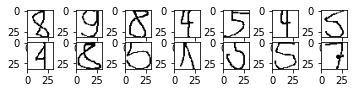

In [253]:
i = 0
for index, row in wrongs.iterrows():
    im = Image.open("C:/Users/tipe_/Documents/Koulu/DataScienceIntro/notebookit/week3/" + row['path'])
    plt.subplot(7,7,i+1)
    plt.imshow(im)
    i+=1

In [378]:
def RandomForestFunc(symboldata, targets):
    # Subset data
    X_train, X_test, Y_train, Y_test = train_test_split(symboldata, targets, test_size=0.1, random_state=3)
    
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=20)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,Y_train['symbol_id'])
    
    # Make predictions
    Y_pred=clf.predict(X_test)
        
    # Use score function to get accuracy of model
    print("Score: " +str(scoreInfo(X_test,Y_test)))
    
    # evaluate the model (and print)
    #clfEvaluator(clf, X_train,Y_train)
    evaluate2(clf,X_test,Y_test['symbol_id'])
    
    # Select the wrongly predicted images
    wrongPreds(Y_test,Y_pred)
    

In [324]:
def scoreInfo(X_test,Y_test):
    score = clf.score(X_test, Y_test['symbol_id'])
    return score

In [325]:
def wrongPreds(Y_test, Y_pred):
    wrongs = Y_test.loc[((Y_test['symbol_id']-Y_pred)!=0)]
    wrongs.head()
    
    print("Wrongly predicted:")
    
    i = 0
    for index, row in wrongs.iterrows():
        im = Image.open("C:/Users/tipe_/Documents/Koulu/DataScienceIntro/notebookit/week3/" + row['path'])
        plt.subplot(7,7,i+1)
        plt.imshow(im)
        i+=1

In [326]:
def clfEvaluator(clf, X_train,Y_train):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(clf, X_train, Y_train['symbol_id'], scoring='accuracy', n_jobs=-1, error_score='raise')

    #n_scores = cross_val_score(clf, X_train, Y_train['symbol_id'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [350]:
# explore random forest bootstrap sample size on performance

# get a list of models to evaluate
def get_models(X_train,Y_train):
    models = dict()
    
    # explore ratios from 10% to 100% in 10% increments
    for i in range(1,21):
        key = (i*10)
        models[key] = RandomForestClassifier(n_estimators=(i*10)).fit(X_train,Y_train['symbol_id'])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_test, Y_test):
    
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    #scores = cross_val_score(model, X_train, Y_train['symbol_id'], scoring='accuracy', cv=cv, n_jobs=-1)
    scores = cross_val_score(model, X_test, Y_test['symbol_id'], scoring='accuracy', n_jobs=-1)
    #scores = model.score(X_test,Y_test['symbol_id'])

    return scores

In [351]:
def exploreTrees(symboldata,targets):
    
    X_train, X_test, Y_train, Y_test = train_test_split(symboldata, targets, test_size=0.1, random_state=3)

    # get the models to evaluate
    models = get_models(X_train,Y_train)
    
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        
        # evaluate the model
        scores = evaluate_model(model, X_test, Y_test)
        
        # store the results
        results.append(scores)
        names.append(name)
        
        # summarize the performance along the way
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

    # plot model performance for comparison
    plt.boxplot(results, labels=names, showmeans=True)
    plt.show()

Score: 0.7843137254901961
Model Performance
Average Error: 0.7745 degrees.
Accuracy = 98.97%.
Wrongly predicted:


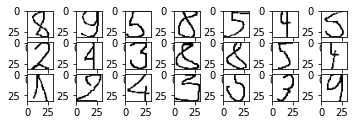

In [379]:
RandomForestFunc(symboldata,targets)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>10 0.384 (0.060)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>20 0.474 (0.066)
>30 0.504 (0.107)
>40 0.466 (0.087)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>50 0.514 (0.101)
>60 0.523 (0.073)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>70 0.487 (0.112)
>80 0.485 (0.078)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>90 0.572 (0.061)
>100 0.581 (0.076)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>110 0.552 (0.075)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>120 0.582 (0.058)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>130 0.582 (0.058)
>140 0.487 (0.112)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>150 0.504 (0.086)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>160 0.525 (0.096)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>170 0.553 (0.069)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>180 0.514 (0.081)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>190 0.526 (0.103)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


>200 0.600 (0.086)


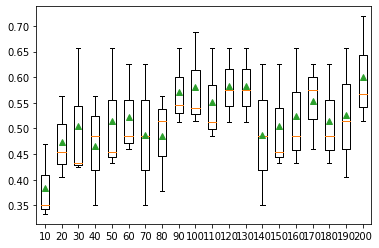

In [352]:
exploreTrees(symboldata,targets)

#### Thoughts

The results get better a little bit by increasing number of trees, but not endlessly. 100-140 trees is probably optimal for the dataset. However, these results should not be used to pick number of trees for the model, because it would overfit the model to test data. Our test data is not a great representation of all possible hand written characters so the model would not work well with other datasets.


#### Using validation data: 80-10-10 split

In [390]:
def optimizeTree(X_train,X_test,Y_train,Y_test,estim,min_split,md):

    # get the models to evaluate
    model = RandomForestClassifier(n_estimators=estim,
                                    min_samples_split=min_split, 
                                    max_depth = md)

    model.fit(X_train,Y_train['symbol_id'])

    # evaluate the model
    print(evaluate_model(model, X_test, Y_test))

In [391]:
X_train, X_test1, Y_train, Y_test1 = train_test_split(symboldata, targets, test_size=0.2, random_state=4)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test1,Y_test1,test_size=0.5,random_state=3)

# Test hyperparameters
optimizeTree(X_train,X_test,Y_train,Y_test,120,2,5)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.54054054 0.4        0.56666667]


In [392]:
optimizeTree(X_train,X_test,Y_train,Y_test,120,5,5)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.45945946 0.4        0.6       ]


In [393]:
optimizeTree(X_train,X_test,Y_train,Y_test,120,10,5)

[0.45945946 0.4        0.5       ]


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [394]:
optimizeTree(X_train,X_test,Y_train,Y_test,120,15,5)

[0.48648649 0.34285714 0.53333333]


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [395]:
optimizeTree(X_train,X_test,Y_train,Y_test,120,20,5)

[0.43243243 0.4        0.5       ]


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [398]:
optimizeTree(X_train,X_test,Y_train,Y_test,120,5,20)

[0.56756757 0.4        0.53333333]


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [400]:
optimizeTree(X_train,X_test,Y_train,Y_test,140,5,20)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.48648649 0.48571429 0.6       ]


In [401]:
# 120,5,20 is the best, I'm trying it now with the validation data

optimizeTree(X_train,X_valid,Y_train,Y_valid,120,5,20)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.54054054 0.79411765 0.61290323]


#### It's Impossible!

I'll try a randomizer next

In [353]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [362]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 200)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,
                  10,
                  11,
                  12,
                  13,
                  14,
                  15,
                  16,
                  17,
                  18,
                  19,
                  20,
                  21,
                  22,
                  23,
                  24,
                  25,
                  26,
                  27,
                  28,
                  29,
                  30,
                  31,
                  31,
                  32,
                  33,
                  34,
                  35,
                  36,
                  37,
                  38,
                  39,
                  40,
                  41,
                  42,
                  43,
  

In [364]:
X_train, X_test1, Y_train, Y_test1 = train_test_split(symboldata, targets, test_size=0.2, random_state=4)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test1,Y_test1,test_size=0.5,random_state=3)

In [365]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune


results, names = list(), list()
    
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model = RandomForestClassifier()

model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

model_random.fit(X_train,Y_train['symbol_id'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   48.0s finished
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [366]:
model_random.best_params_

{'n_estimators': 171,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': False}

In [370]:
def evaluate2(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train['symbol_id'])
base_accuracy = evaluate2(base_model, X_test, Y_test['symbol_id'])

Model Performance
Average Error: 1.0392 degrees.
Accuracy = 98.64%.


In [372]:
best_random = model_random.best_estimator_
random_accuracy = evaluate2(best_random, X_test, Y_test['symbol_id'])

Model Performance
Average Error: 0.6176 degrees.
Accuracy = 99.19%.


In [373]:
random_valid = evaluate2(best_random,X_valid,Y_valid['symbol_id'])

Model Performance
Average Error: 0.7255 degrees.
Accuracy = 99.05%.


In [377]:
clfEvaluator(best_random, X_valid,Y_valid)

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.688 (0.098)


In [380]:
best_pred =best_random.predict(X_valid)
best_pred

array([77, 76, 70, 70, 70, 74, 78, 71, 76, 71, 71, 75, 71, 70, 77, 70, 77,
       72, 76, 76, 74, 71, 71, 78, 79, 76, 70, 75, 76, 76, 70, 70, 76, 71,
       78, 73, 75, 70, 71, 79, 72, 75, 78, 77, 72, 74, 77, 73, 78, 74, 71,
       73, 71, 70, 75, 78, 70, 73, 77, 77, 74, 72, 78, 72, 71, 79, 76, 71,
       78, 77, 75, 70, 72, 79, 75, 76, 76, 70, 71, 77, 72, 79, 76, 71, 76,
       73, 77, 76, 70, 78, 73, 72, 73, 71, 75, 78, 72, 77, 77, 71, 70, 77],
      dtype=int64)

Wrongly predicted:


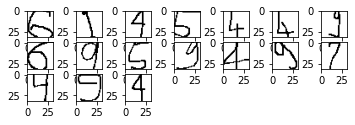

In [382]:
wrongPreds(Y_valid, best_pred)

Much better! Well.. not that much but a bit better!

### Time for t-pot
Trying to optimize a model and parameters with t-pot



In [403]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(symboldata, targets,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=5, population_size=10, verbosity=2, random_state=42)
tpot.fit(X_train, y_train['symbol_id'])
print(tpot.score(X_test, y_test['symbol_id']))
tpot.export('tpot_digits_pipeline.py')

Version 0.10.2 of tpot is outdated. Version 0.11.5 was released Monday June 01, 2020.


Generation 1 - Current best internal CV score: 0.8506210335071802
Generation 2 - Current best internal CV score: 0.8506210335071802
Generation 3 - Current best internal CV score: 0.8506210335071802
Generation 4 - Current best internal CV score: 0.8518752911820832
Generation 5 - Current best internal CV score: 0.8518752911820832

Best pipeline: LogisticRegression(ZeroCount(BernoulliNB(input_matrix, alpha=100.0, fit_prior=False)), C=5.0, dual=False, penalty=l2)
0.8627450980392157


In [421]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator, ZeroCount

# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = train_test_split(symboldata, targets, test_size=0.2,random_state=42)

# Average CV score on the training set was:0.8518752911820832
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=BernoulliNB(alpha=100.0, fit_prior=False)),
    ZeroCount(),
    LogisticRegression(C=5.0, dual=False, penalty="l2")
)

exported_pipeline.fit(training_features, training_target['symbol_id'])
results = exported_pipeline.predict(testing_features)


C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [422]:
results

array([73, 74, 73, 72, 75, 76, 73, 76, 77, 74, 71, 76, 76, 79, 78, 78, 75,
       71, 78, 72, 79, 78, 71, 72, 73, 76, 72, 75, 78, 76, 73, 76, 79, 73,
       72, 71, 70, 74, 72, 72, 75, 75, 77, 72, 71, 71, 78, 71, 71, 71, 74,
       76, 75, 72, 71, 70, 71, 72, 76, 72, 77, 70, 71, 72, 70, 72, 73, 75,
       74, 71, 71, 75, 70, 78, 74, 75, 73, 72, 75, 73, 79, 79, 79, 74, 73,
       70, 76, 79, 76, 75, 79, 71, 73, 76, 78, 75, 71, 76, 73, 71, 70, 70,
       79, 72, 71, 75, 71, 78, 73, 71, 78, 75, 79, 78, 75, 76, 78, 70, 76,
       75, 73, 75, 74, 70, 78, 75, 73, 73, 77, 70, 77, 73, 76, 70, 71, 71,
       75, 78, 71, 71, 78, 70, 74, 75, 76, 70, 70, 78, 71, 71, 73, 74, 70,
       74, 72, 76, 75, 75, 73, 70, 72, 71, 76, 70, 76, 78, 73, 76, 75, 74,
       71, 71, 72, 70, 72, 75, 72, 78, 76, 73, 72, 71, 77, 72, 77, 77, 73,
       73, 77, 79, 72, 72, 74, 74, 77, 78, 78, 79, 71, 73, 73, 77, 74, 78],
      dtype=int64)

Wrongly predicted:


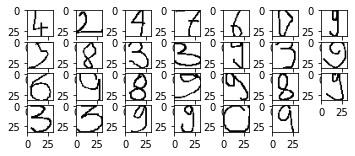

In [423]:
wrongPreds(testing_target, results)

In [424]:
evaluate2(exported_pipeline, testing_features,testing_target['symbol_id'])

Model Performance
Average Error: 0.5196 degrees.
Accuracy = 99.32%.


99.3245800995825

### Conclusions


|Model                         | Average Error  | Accuracy |
|-------------------------|----------------|----------|
|        Base Model       | 1.0392 degrees | 98.64%   |
| Randomizer Optimization | 0.7255 degrees | 99.05%   |
|          T-pot          | 0.5196 degrees        | 99.32%   |

T-pot worked the best according to the metrics! It had the least average error by far and it was the most accurate. However, when I checked the wrongly predicted ones, there was a surprising amount. I will definitely be looking into t-pot in the future, and trying it with different datasets.